In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('ams24.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,GBC
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,GBC
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,GBC
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,GBC
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,GBC


In [4]:
len(df)

18512

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18512 non-null  int64  
 1   N_Person           18512 non-null  int64  
 2   Xcenter            18512 non-null  float64
 3   Ycenter            18512 non-null  float64
 4   PerXmin            18512 non-null  float64
 5   PerYmin            18512 non-null  float64
 6   PerXmax            18512 non-null  float64
 7   PerYmax            18512 non-null  float64
 8   N_Handgun          18512 non-null  int64  
 9   HgXcenter          18512 non-null  float64
 10  HgYcenter          18512 non-null  float64
 11  HgXmin             18512 non-null  float64
 12  HgYmin             18512 non-null  float64
 13  HgXmax             18512 non-null  float64
 14  HgYmax             18512 non-null  float64
 15  Intersection       18512 non-null  object 
 16  Included_Center    185

In [6]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14256
Ycenter              14237
PerXmin              14264
PerYmin              14261
PerXmax              14264
PerYmax              14241
N_Handgun                5
HgXcenter             7304
HgYcenter             7302
HgXmin                7306
HgYmin                7306
HgXmax                7306
HgYmax                7305
Intersection             9
Included_Center          2
Intersection_Area     8474
Hg_Area               7306
Distance             18512
Ground_Truth             3
GT                       3
dtype: int64

In [7]:
df['Ground_Truth'].value_counts()

0    15980
1     2319
2      213
Name: Ground_Truth, dtype: int64

In [8]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,GBC,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,GBC,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,GBC,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,GBC,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,GBC,1,0,0,0,0,0,0,0,0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18512 non-null  int64  
 1   N_Person                      18512 non-null  int64  
 2   Xcenter                       18512 non-null  float64
 3   Ycenter                       18512 non-null  float64
 4   PerXmin                       18512 non-null  float64
 5   PerYmin                       18512 non-null  float64
 6   PerXmax                       18512 non-null  float64
 7   PerYmax                       18512 non-null  float64
 8   N_Handgun                     18512 non-null  int64  
 9   HgXcenter                     18512 non-null  float64
 10  HgYcenter                     18512 non-null  float64
 11  HgXmin                        18512 non-null  float64
 12  HgYmin                        18512 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [10]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'GBC', 0: 'MLP', 2: 'RFC'}


In [11]:
print(df2['Ground_Truth'].value_counts())

0    15980
1     2319
2      213
Name: Ground_Truth, dtype: int64


In [12]:
df3 = df2.drop(columns=["GT"])

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18512 non-null  int64  
 1   N_Person                      18512 non-null  int64  
 2   Xcenter                       18512 non-null  float64
 3   Ycenter                       18512 non-null  float64
 4   PerXmin                       18512 non-null  float64
 5   PerYmin                       18512 non-null  float64
 6   PerXmax                       18512 non-null  float64
 7   PerYmax                       18512 non-null  float64
 8   N_Handgun                     18512 non-null  int64  
 9   HgXcenter                     18512 non-null  float64
 10  HgYcenter                     18512 non-null  float64
 11  HgXmin                        18512 non-null  float64
 12  HgYmin                        18512 non-null  float64
 13  H

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14809, 28) (14809,)
(3703, 28) (3703,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8614356135206729
mean_test =  0.8614356169133346


,fit_time,score_time,test_score,train_score
0,0.059843,0.002992,0.861580,0.861420
1,0.059843,0.002992,0.861580,0.861420
2,0.060868,0.002993,0.861580,0.861420
3,0.060872,0.002990,0.861580,0.861420
4,0.060840,0.002993,0.861580,0.861420
5,0.060843,0.001995,0.861580,0.861420
6,0.059845,0.002990,0.861580,0.861420
7,0.059845,0.002992,0.860905,0.861495
8,0.059839,0.002968,0.860905,0.861495
9,0.058849,0.002992,0.861486,0.861430


In [16]:
# save the model to disk
filename = 'rfc_model_intersection_0.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8906295249362403
mean_test =  0.8895272551417047


,fit_time,score_time,test_score,train_score
0,0.100734,0.002990,0.894666,0.900135
1,0.100734,0.002989,0.893991,0.890756
2,0.099706,0.003018,0.897367,0.889481
3,0.101730,0.002990,0.885888,0.891131
4,0.099735,0.002991,0.880486,0.886555
5,0.099735,0.002991,0.887914,0.884529
6,0.101728,0.002965,0.882512,0.887980
7,0.106686,0.002992,0.887914,0.890606
8,0.103753,0.002992,0.885888,0.888205
9,0.100730,0.002992,0.898649,0.896916


In [16]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[  92,  388],
        [   3, 3220]],

       [[3263,    3],
        [ 345,   92]],

       [[3660,    0],
        [  43,    0]]], dtype=int64)

                         feature  importance       std
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
23           Intersection_Inside    0.000950  0.002851
27         Intersection_Up_right    0.001466  0.004397
24  Intersection_No_intersection    0.002887  0.008660
19      Intersection_Center_left    0.006744  0.011851
13                        HgXmax    0.007036  0.011536
15               Included_Center    0.007859  0.017648
11                        HgXmin    0.010835  0.022003
9                      HgXcenter    0.015466  0.016812
8                      N_Handgun    0.019124  0.030864
20     Intersection_Center_right    0.022435  0.045375
17                       Hg_Area    0.027702  0.055494
1                       N_Person    0.033242  0.056168
18                      Distance    0.037046  0.050144
4         

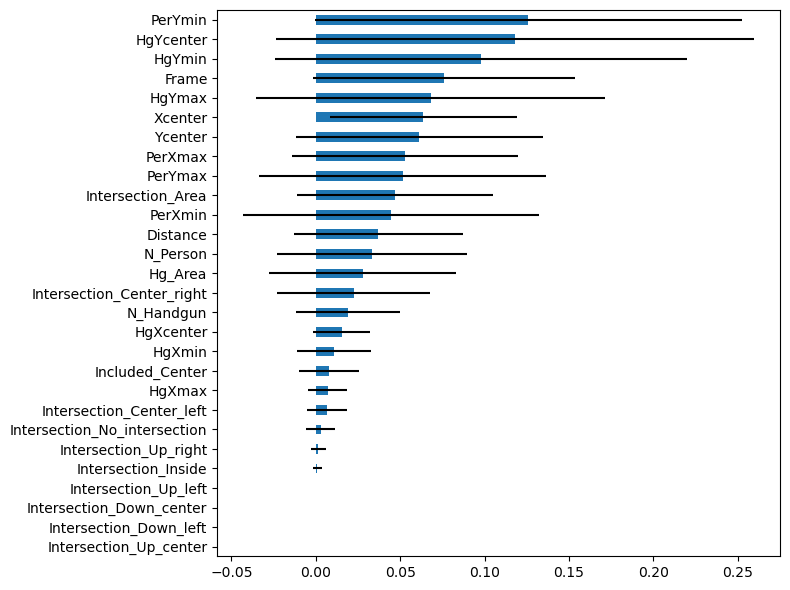

In [17]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3223
           1       0.97      0.21      0.35       437
           2       0.00      0.00      0.00        43

    accuracy                           0.89      3703
   macro avg       0.62      0.40      0.43      3703
weighted avg       0.89      0.89      0.86      3703



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18512 non-null  int64  
 1   N_Person                      18512 non-null  int64  
 2   Xcenter                       18512 non-null  float64
 3   Ycenter                       18512 non-null  float64
 4   PerXmin                       18512 non-null  float64
 5   PerYmin                       18512 non-null  float64
 6   PerXmax                       18512 non-null  float64
 7   PerYmax                       18512 non-null  float64
 8   N_Handgun                     18512 non-null  int64  
 9   HgXcenter                     18512 non-null  float64
 10  HgYcenter                     18512 non-null  float64
 11  HgXmin                        18512 non-null  float64
 12  HgYmin                        18512 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86611178, -1.00640658,  0.38620049, -1.05671043,  0.40759683,
        -0.80034181,  0.34912188, -1.42496035, -0.49676412,  0.6459943 ,
        -1.25678889,  0.69876439, -1.17546134,  0.59183179, -1.33345098,
         1.17410276, -0.05200918, -0.63079265, -0.6965104 ,  2.6675342 ,
        -0.2810276 , -0.01800609, -0.0103947 , -0.53921649, -1.08435903,
        -0.11981721, -0.06160912, -0.14122643],
       [-1.86394078, -1.00640658,  0.38591474, -1.05612058,  0.40661467,
        -0.79865409,  0.34956752, -1.42770591, -0.49676412,  0.64440066,
        -1.25764222,  0.69576513, -1.17611191,  0.59163104, -1.33450901,
         1.17410276, -0.04959585, -0.62491426, -0.6950817 ,  2.6675342 ,
        -0.2810276 , -0.01800609, -0.0103947 , -0.53921649, -1.08435903,
        -0.11981721, -0.06160912, -0.14122643],
       [-1.86176978, -1.00640658,  0.3865353 , -1.0582726 ,  0.40808368,
        -0.80270531,  0.34928648, -1.42369897, -0.49676412,  0.64422224,
        -1.25905502,  0.6956

In [22]:
print(scaler.mean_)

[8.59563202e+02 8.79807692e-01 3.93086265e+02 3.82350806e+02
 3.05761672e+02 2.46019627e+02 4.80410857e+02 5.18681985e+02
 2.98347018e-01 3.10991858e+02 3.12347984e+02 2.87607708e+02
 2.92795352e+02 3.34376009e+02 3.31900615e+02 4.20429991e-01
 9.31724565e+02 2.02814656e+03 2.31838166e+02 1.23217373e-01
 7.31957649e-02 3.24114088e-04 1.08038029e-04 2.25259291e-01
 5.40406223e-01 1.41529818e-02 3.78133103e-03 1.95548833e-02]


In [23]:
print(scaler.scale_)

[4.60617210e+02 8.74207016e-01 2.12100162e+02 6.88626293e+01
 2.19863285e+02 1.11973285e+02 2.12564143e+02 3.92423666e+01
 6.00580847e-01 1.53082048e+02 9.73115103e+01 1.52349871e+02
 9.92629631e+01 1.54306673e+02 9.59317416e+01 4.93628011e-01
 1.66892407e+03 1.81777378e+03 1.37424040e+02 3.28686555e-01
 2.60457568e-01 1.80002511e-02 1.03935729e-02 4.17752969e-01
 4.98364663e-01 1.18121442e-01 6.13761563e-02 1.38464760e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13884, 28)

In [26]:
y_train.value_counts()

0    11985
1     1739
2      160
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4628, 28)

In [28]:
y_test.value_counts()

0    3995
1     580
2      53
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[9.99679988e-01, 3.08125404e-04, 1.18867565e-05],
       [9.99999974e-01, 1.75733604e-08, 8.13637233e-09],
       [9.99838529e-01, 7.74644727e-05, 8.40069722e-05],
       ...,
       [1.00000000e+00, 4.82756148e-15, 8.10267776e-14],
       [9.99999984e-01, 5.31909063e-15, 1.60135670e-08],
       [1.00000000e+00, 6.21496648e-15, 4.05805968e-14]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 576,   57],
        [  42, 3953]],

       [[4002,   46],
        [  59,  521]],

       [[4572,    3],
        [   5,   48]]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3995
           1       0.92      0.90      0.91       580
           2       0.94      0.91      0.92        53

    accuracy                           0.98      4628
   macro avg       0.95      0.93      0.94      4628
weighted avg       0.98      0.98      0.98      4628



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9850187265917603
Score test =  0.9770959377700951


In [42]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

KeyboardInterrupt: 

In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))